In [5]:
#Use decision trees to prepare a model on fraud data 
#treating those who have taxable_income <= 30000 as "Risky" and others are "Good"
#Data Description :

#Undergrad : person is under graduated or not
#Marital.Status : marital status of a person
#Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
#Work Experience : Work experience of an individual person
#Urban : Whether that person belongs to urban area or not



In [22]:
import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline

In [23]:
dt = pd.read_csv("E:\\Excelr\\Assignments\\Assignments DS\\Decision Tree\\Fraud_check.csv")
dt.head(4)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES


In [24]:
#checking for null values in the dataset
dt.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [25]:
dt['Marital.Status'] = dt['Marital.Status'].apply(lambda x: 0 if x=='Single' else 1)
dt['Undergrad'] = dt['Undergrad'].apply(lambda x: 0 if x=='no' else 1)
dt['Urban'] = dt['Urban'].apply(lambda x: 0 if x=='no' else 1)
dt.head(4)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,1,0,68833,50047,10,1
1,1,1,33700,134075,18,1
2,1,1,36925,160205,30,1
3,1,0,50190,193264,15,1


In [26]:
#Converting the taxes column into categorical variable
taxes = []
for value in dt["Taxable.Income"]:
    if value<=30000:
        taxes.append("Risky")
    else:
        taxes.append("good")
        
dt["taxes"]= taxes

In [27]:
dt.head(4)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,taxes
0,1,0,68833,50047,10,1,good
1,1,1,33700,134075,18,1,good
2,1,1,36925,160205,30,1,good
3,1,0,50190,193264,15,1,good


In [28]:
#dropping the sales column
dt=dt.drop(['Taxable.Income'], axis=1)
dt.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,taxes
0,1,0,50047,10,1,good
1,1,1,134075,18,1,good
2,1,1,160205,30,1,good
3,1,0,193264,15,1,good
4,1,1,27533,28,1,good


In [29]:
#preparing the data
X = dt.drop('taxes', axis=1)
y = dt['taxes']

In [30]:
# Splitting data into training and testing data set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y ,test_size = 0.2, random_state=42)

In [88]:
from sklearn.tree import  DecisionTreeClassifier
en = DecisionTreeClassifier(criterion = 'entropy')
en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [89]:
preds = en.predict(X_test)
#preds is predicted values of test data

In [90]:
type(preds)

numpy.ndarray

In [91]:
pd.Series(preds).value_counts()

good     97
Risky    23
dtype: int64

In [92]:
pd.crosstab(y_test,preds) #confusion matix

col_0,Risky,good
taxes,,
Risky,5,21
good,18,76


In [93]:
dt['taxes'].unique()

array(['good', 'Risky'], dtype=object)

In [94]:
dt.taxes.value_counts()

good     476
Risky    124
Name: taxes, dtype: int64

In [95]:
np.mean(preds==y_test) # Accuracy = Test

0.675

In [96]:
temp = pd.Series(en.predict(X_train)).reset_index(drop=True)

In [97]:
np.mean(pd.Series(y_train).reset_index(drop=True) == pd.Series(en.predict(X_train)))
# Accuracy = train

1.0

In [67]:
#feature engineering

X_train_fe = X_train.drop(['Undergrad','Marital.Status','Work.Experience','Urban'],axis=1)
X_test_fe = X_test.drop(['Undergrad','Marital.Status','Work.Experience','Urban'],axis=1)

In [68]:
#DecisionTreeClassifier with entropy 

clf_en_fe = DecisionTreeClassifier(criterion='entropy')


# fit the model
clf_en_fe.fit(X_train_fe, y_train)

DecisionTreeClassifier(criterion='entropy')

In [69]:
y_pred_train_en_fe = clf_en_fe.predict(X_train_fe)

In [70]:
y_pred_test_en_fe = clf_en_fe.predict(X_test_fe)

In [71]:
print('Training data: {:.4f}'.format(clf_en_fe.score(X_train_fe, y_train)))

print('Test data: {:.4f}'.format(clf_en_fe.score(X_test_fe, y_test)))

Training data: 0.9979
Test data: 0.6917


In [72]:
#XGB boosting technique
import xgboost as xgb
import pandas as pd



In [73]:
### Preparing XGB classifier 
xgb1 = xgb.XGBClassifier(learning_rate = 0.1, n_estimators = 20)
xgb1.fit(X_train,y_train)
train_pred_xgb = xgb1.predict(X_train)

In [74]:
import numpy as np
accuracy_train_data = np.mean(train_pred_xgb==y_train) 
print(accuracy_train_data)

0.8020833333333334


In [75]:
test_pred_xgb=xgb1.predict(X_test)

In [76]:
accuracy_test_data=np.mean(test_pred_xgb==y_test)
print(accuracy_test_data)

0.7916666666666666


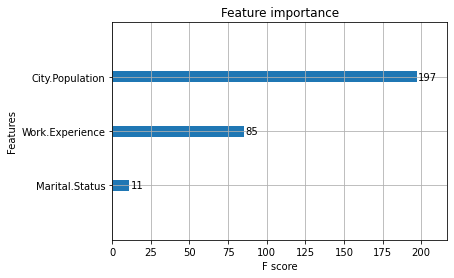

In [78]:
# Variable importance plot 
from xgboost import plot_importance
plot_importance(xgb1)

[Text(269.0100551808706, 214.33371428571428, 'X[2] <= 60294.5\nentropy = 0.73\nsamples = 480\nvalue = [98, 382]'),
 Text(224.2400490496628, 208.12114285714284, 'X[3] <= 6.5\nentropy = 0.602\nsamples = 102\nvalue = [15, 87]'),
 Text(218.9850643776824, 201.90857142857143, 'entropy = 0.0\nsamples = 17\nvalue = [0, 17]'),
 Text(229.49503372164315, 201.90857142857143, 'X[3] <= 24.5\nentropy = 0.672\nsamples = 85\nvalue = [15, 70]'),
 Text(207.16134886572655, 195.696, 'X[2] <= 39943.0\nentropy = 0.777\nsamples = 61\nvalue = [14, 47]'),
 Text(188.7689025137952, 189.48342857142856, 'X[3] <= 23.0\nentropy = 0.918\nsamples = 27\nvalue = [9, 18]'),
 Text(183.51391784181484, 183.27085714285715, 'X[2] <= 39305.5\nentropy = 0.89\nsamples = 26\nvalue = [8, 18]'),
 Text(178.25893316983445, 177.05828571428572, 'X[3] <= 9.5\nentropy = 0.855\nsamples = 25\nvalue = [7, 18]'),
 Text(162.49397915389332, 170.84571428571428, 'X[2] <= 30101.5\nentropy = 0.918\nsamples = 3\nvalue = [2, 1]'),
 Text(157.238994481

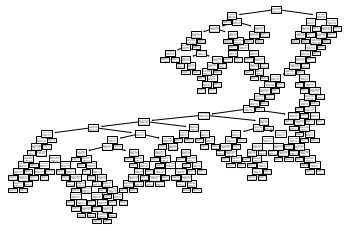

In [103]:
#visualize the decision tree
from sklearn import tree

tree.plot_tree(en.fit(X_train, y_train))